### Code for: "Eusociality through conflict dissolution" by Mauricio González-Forero and Jorge Peña

Running the cells of this notebooks in order produces unannotated versions of Fig. S10.

In [1]:
using PyPlot,Colors,ColorSchemes

In [2]:
f1 = 30
s1 = 0.2
sM = 0.9
f2 = 60
s2 = 0.5
p = 0.5

0.5

In [3]:
h̄ = f1

F1(l,f2,h,σ1,σ2) = σ1[l]*(f1-h)*s1
F2(l,f2,h,σ1,σ2) = f2*σ2[l]*s2

Π(l,f2,h,σ1,σ2) = F1(l,f2,h,σ1,σ2)+sM*F2(l,f2,h,σ1,σ2)

Π (generic function with 1 method)

In [4]:
♀ = 1
♂ = 2
mr = 1
rm = 2

q = zeros((2,2))
q[♀,mr] = 1/2
q[♀,rm] = 1
q[♂,mr] = 1/2
q[♂,rm] = 0

0

In [5]:
function u(l)
    if l == ♀
        q[♀,rm]/(q[♀,rm]+q[♂,mr])
    elseif l == ♂
        q[♂,mr]/(q[♀,rm]+q[♂,mr])
    end
end

v(l,f2,h,σ1,σ2) = (l == ♂)*1 + (l == ♀)*Π(♂,f2,h,σ1,σ2)/Π(♀,f2,h,σ1,σ2)

v (generic function with 1 method)

In [6]:
function ιpOB(f2,h,σ1,σ2)
    ι = 0
    for l in (♀,♂)
        ι += σ1[l]*u(l)*v(l,f2,h,σ1,σ2)
    end
    return ι
end

function κpOB(f2,h,σ1,σ2)
    κ = 0
    for l in (♀,♂)
        for lp in (♀,♂)
            for k in (rm,mr)
                κ += σ1[l]*σ2[lp]*u(k)*q[l,k]*q[lp,k]*v(lp,f2,h,σ1,σ2)
            end
        end
    end
    return κ
end

function ιpMB(f2,h,σ1,σ2)
    ι = 0
    for l in (♀,♂)
        ι += σ1[l]*q[l,mr]*v(l,f2,h,σ1,σ2)
    end
    ι *= u(mr)
    return ι
end
function κpMB(f2,h,σ1,σ2)
    κ = 0
    for lp in (♀,♂)
        κ += σ2[lp]*q[lp,mr]*v(lp,f2,h,σ1,σ2)
    end
    κ *= u(mr)
    return κ
end

κpMB (generic function with 1 method)

In [7]:
# critical benefit-cost ratios
BCOB(f2,h,σ1,σ2) =  ιpOB(f2,h,σ1,σ2)/κpOB(f2,h,σ1,σ2)
BCMB(f2,h,σ1,σ2) =  ιpMB(f2,h,σ1,σ2)/κpMB(f2,h,σ1,σ2)

BCMB (generic function with 1 method)

In [8]:
function diff_BC(σ1,σ2)
    σ1vec = (σ1,1-σ1)
    σ2vec = (σ2,1-σ2)
    return BCOB(f2,h̄*p,σ1vec,σ2vec)-BCMB(f2,h̄*p,σ1vec,σ2vec)
end

diff_BC (generic function with 1 method)

In [9]:
colorname(c) = string("#",hex(c))

function meshgrid(x, y)
    X = [i for i in x, j in 1:length(y)]
    Y = [j for i in 1:length(x), j in y]
    return X, Y
end

meshgrid (generic function with 1 method)

In [10]:
ColorSchemes.seaborn_colorblind

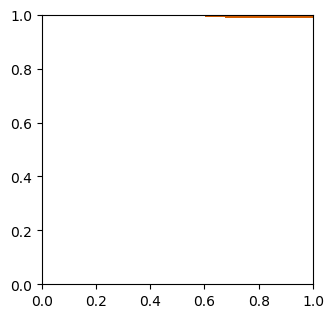

In [11]:
fig = PyPlot.figure(figsize=(3.5,3.5))

σ1s = range(0.,stop=1.,length=100)
σ2s = range(0.,stop=1.,length=100)

Σ1, Σ2 = meshgrid(σ1s, σ2s)
Δ = diff_BC.(Σ1,Σ2)

PyPlot.contourf(Σ1,Σ2,Δ,levels=[-Inf,0],colors=colorname(ColorSchemes.seaborn_colorblind[4]),alpha=1.)

PyPlot.savefig("FigS10A.pdf",bbox_inches="tight")

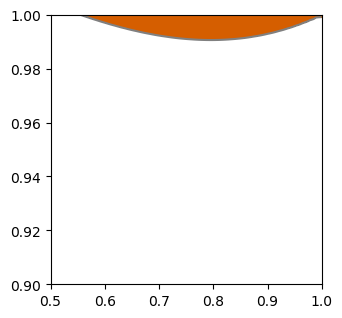

In [12]:
fig = PyPlot.figure(figsize=(3.5,3.5))

σ1s = range(0.5,stop=1.,length=100)
σ2s = range(0.9,stop=1.,length=100)

Σ1, Σ2 = meshgrid(σ1s, σ2s)
Δ = diff_BC.(Σ1,Σ2)

PyPlot.contour(Σ1,Σ2,Δ,levels=[0],colors="gray",alpha=1.)
PyPlot.contourf(Σ1,Σ2,Δ,levels=[-Inf,0],colors=colorname(ColorSchemes.seaborn_colorblind[4]),alpha=1.)

PyPlot.savefig("FigS10B.pdf",bbox_inches="tight")